In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tqdm
import random
import os

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

In [ ]:
# !ls 'drive/My Drive/Training/NeuralNet_FeatImportance'
df = pd.read_excel('drive/My Drive/Training/NeuralNet_FeatImportance/Folds5x2_pp.xlsx')
print(df.shape)
df.head()

(9568, 5)


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


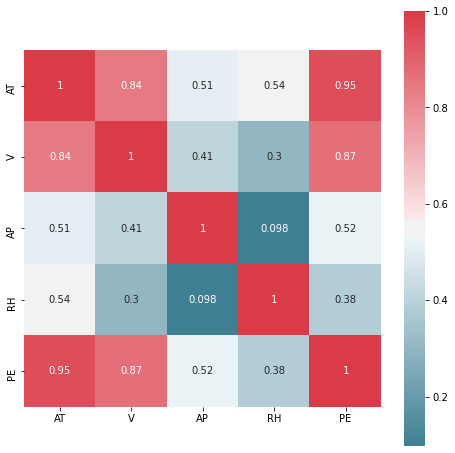

In [ ]:
### PLOT CORRELATION MATRIX ###
plt.figure(figsize=(8,8))
train_size = int(df.shape[0]*0.8)
corr_matrix = df.iloc[:train_size,:].corr().abs()
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, annot=True)

In [ ]:
### TRAIN TEST SPLIT ###
X, y = ['AT','V','AP','RH'], ['PE']
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size = 0.2, random_state = 42)

In [ ]:
### FIT GRADIENTBOOSTING ###
gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
### PREDICTION ERROR ON TEST DATA ###

mean_absolute_error(y_test, gb.predict(X_test))

2.9480138332131247

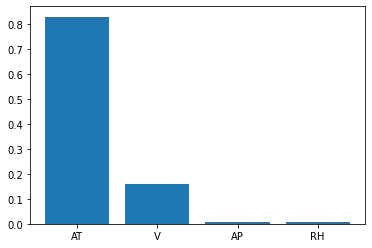

In [ ]:
### FEATURE IMPORTANCES REPORT ###

plt.bar(range(X_train.shape[1]), gb.feature_importances_)
plt.xticks(range(X_train.shape[1]), ['AT','V','AP','RH'])
np.set_printoptions(False)